# Mach-Zehnder Interferometer

An interferometer is just an instrument that utilizes the interference between two beams of light to make precise measurements.

The Mach-Zehnder Interferometer (MZI) splits a light beam, sends the light down two different paths and recombines the light. We say that the MZI is balanced if the two paths are the same distance or unblanced if the path lengths differ.

![Image of a MZI](https://raw.githubusercontent.com/BYUCamachoLab/Photonics-Bootcamp/main/book/images/Notebook_Images/mzi_outline_ports_marked.webp)

One implementation of this concept is illustrated above. Notice that the inner path of the MZI is shorter than the outer path, therefore the MZI is unbalanced. This implies that the two light beams will be out of phase with each other when they are recombined and interference occurs.

Since the interference that occurs when the light is recombined is dependent on the the wavelength of the intitial beam of light, the amount of light that leaves the interferometer will be dependent on the initial wavelength.

# Sweeping
Imagine we shined a laser into the first grating coupler and then adjusted the wavelength over some range. We then can plot the data from the intensity of the light leaving the MZI against the wavelengths we tested. This is sometimes referred to as "sweeping."

![Image of an MZI with labels](https://raw.githubusercontent.com/BYUCamachoLab/Photonics-Bootcamp/main/book/images/Notebook_Images/plot_mzi.webp)

Click here for more information about implementing sweeps:
https://simphonyphotonics.readthedocs.io/en/stable/tutorials/mzi.html

# Analysis of a Balanced MZI

You can think of a balanced interferometer as having equal path lengths when the light separates. In ideal conditions, this means that amount of power at the output is the same as the input. 

You can install `pip install gdsfactory[full]` for better visualization


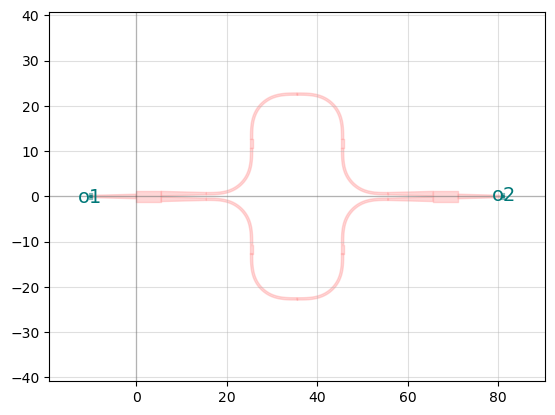

my_component: uid 4dfe1431, ports [], references ['mzi_1'], 0 polygons


In [1]:
import gdsfactory as gf

PDK = gf.get_generic_pdk()
PDK.activate()

c = gf.Component("my_component")
mzi = c << gf.components.mzi(delta_length=0)

c


There are there three different relevant amplitudes:
1. The amplitude of the input light:
$$
    I_{input} = E_{input}^2
$$

2. The amplitudes of the beams after the split
$$
    E_{1} = \frac{E_{input}}{\sqrt{2}}, \hspace{2mm} E_{2} = \frac{E_{input}}{\sqrt{2}}
$$

3. The amplitude of the recombined light
$$
    E_{output} = \frac{E_{1}+E_{2}}{\sqrt{2}} = I_{input}
$$

***Note that these are not generalized equations. Instead, these describe balanced insterferometers whose branches have not undergone a phase shift.

### Quick Check
If intensity of the input wave is .5 mW, what is the intensity at the output?

# Basic Definitions

It would be helpful to mathematically model the light in our waveguides. We can start to build a model by considering the equation for a plane wave.

$$    
    E = E_0 e^{i(\omega t - \beta z)}
$$

Propogation Constant of Light:
$$
    \beta = \frac{2 \pi n}{\lambda} 
$$

If the equations above describe the propogation of the wave before the light gets split by the MZI, we can represent the two resulting beams as follows.

$$
E_{o1} = \frac{E_{i}}{\sqrt{2}}e^{-i\beta_{1}L_{1}-\frac{\alpha_{1}}{2}L_{1}}
$$

$$
E_{o2} = \frac{E_{i}}{\sqrt{2}}e^{-i\beta_{2}L_{2}-\frac{\alpha_{2}}{2}L_{2}}
$$

*** As the light travels through the waveguide we can imagine that it will experience some degree of loss. The 'α' term that appeared in the exponents is the loss coefficient. For convenience, the following examples will assume that α = 0, or that there is zero loss in our waveguides.

And finally the intensity of the the recombined light at the end of the MZI can be described like so:

$$
I_{output} = \frac{I_{input}}{4} \lvert E_{o1} + E_{o2} \lvert ^2 
$$

# Analysis of Imblanced MZI's

The equation below is the simplified version of the above expressions assuming no difference in the propogation constants of the two different waveguides and no loss.

$$
I_{output} = \frac{I_{input}}{2}(1 + cos(\beta \Delta L))
$$

You can install `pip install gdsfactory[full]` for better visualization


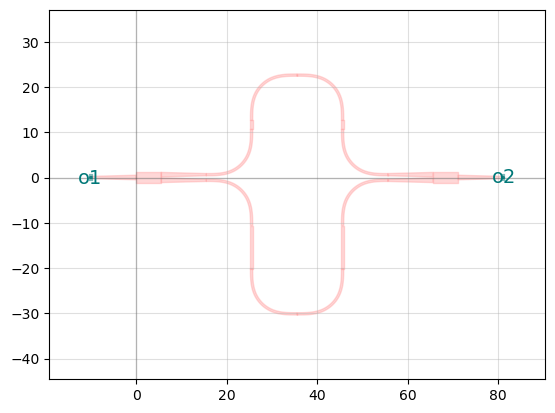

my_component: uid a71ccce9, ports [], references ['mzi_1'], 0 polygons


In [2]:
import gdsfactory as gf

PDK = gf.get_generic_pdk()
PDK.activate()

c = gf.Component("my_component")
mzi = c << gf.components.mzi(delta_length=15)

c


# Thermo-Optic Effect:

While a balanced MZI will not experience a phase shift due to a difference in path length, we can introduce a phasae shift by utilizing other methods. The thermo-optic effect describes the effect of heat on the phase of light. By heating up one of the waveguide in the MZI, we can control the phase shift of that waveguide and therefor the intensity of the output. This is a practical way to turn our otherwise static MZI in to a switch that we can control.

![Image of a thermo-optic switch](https://raw.githubusercontent.com/BYUCamachoLab/Photonics-Bootcamp/main/book/images/Notebook_Images/thermo_optic_switch.png)

$$
I_{output} = \frac{I_{input}}{2}(1 + cos(\Delta\beta L))
$$